In [15]:
import cobra
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from cobra.io import load_json_model
model_file = 'iCN900_09062018.json'

### In this workshop we will use an unpublished version of the <i>C. diff</i> 630 model (iCN900). Please don't distribute!

In [16]:
model = load_json_model(model_file)

In [17]:
# Model Summary:
model

Name,None
Memory address,0x012fa3898
Number of metabolites,874
Number of reactions,1216
Objective expression,1.0*BIOMASS - 1.0*BIOMASS_reverse_69053
Compartments,"c, e"


### Knocking out a single reaction

In [18]:
# Reaction KO
model = load_json_model(model_file)
ASPK = model.reactions.get_by_id('ASPK')
print(ASPK.lower_bound, ASPK.upper_bound)

(0, 1000)


In [19]:
ASPK.lower_bound = 0
ASPK.upper_bound = 0

In [20]:
sol = model.optimize()
print(sol.objective_value)

0.0


### Knocking out a single gene

In [21]:
print(ASPK.gene_reaction_rule)
print(model.genes.CD630_13220.reactions)

(CD630_13220) or (CD630_20540) or (CD630_26270)
frozenset([<Reaction ASPK at 0x14f65b00>])


In [22]:
from cobra.manipulation import delete_model_genes
model = load_json_model(model_file)
delete_model_genes(model,['CD630_13220'])
sol = model.optimize()
print(sol.objective_value)

0.21028281212


# Genome scale gene knockouts

In [25]:
model = load_json_model(model_file)
from cobra.flux_analysis import single_gene_deletion

In [26]:
res= single_gene_deletion(model)
res

,growth,status
ids,,
(CD630_14460),2.102828e-01,optimal
(CD630_07650),2.102828e-01,optimal
(CD630_20850),2.102828e-01,optimal
(CD630_16500),2.102828e-01,optimal
(CD630_27340),2.102828e-01,optimal
(CD630_35580),2.102828e-01,optimal
(CD630_15430),2.102828e-01,optimal
(CD630_21000),2.102828e-01,optimal
(CD630_29900),2.102828e-01,optimal


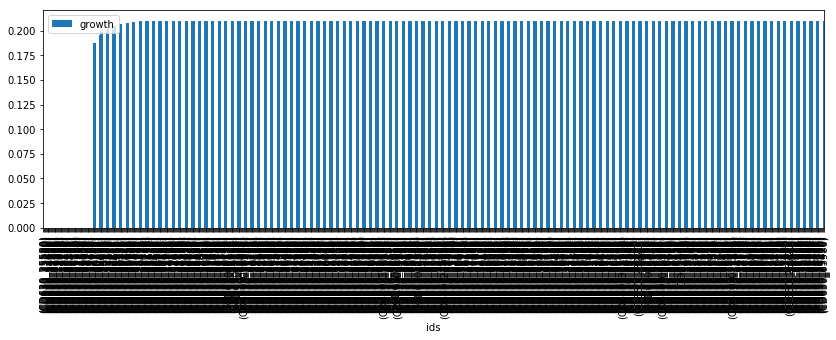

In [28]:
res = res.sort_values('growth')
res.plot(kind='bar',figsize=(14,4))
plt.show()

In [ ]:
# NOW check gene essentiality on some of the the carbon sources from our last workshop: 
# fru, etoh, ac, gln-L, glu-L, akg, succ, fum, mal-L:

In [32]:
# SOLUTION:
model = load_json_model(model_file)
rxns = ['EX_glc__D_e', 'EX_fru_e', 'EX_etoh_e','EX_ac_e', 'EX_gln__L_e','EX_glu__L_e',
    'EX_akg_e', 'EX_succ_e', 'EX_fum_e', 'EX_mal__L_e']
ex_rxns = []
for r in rxns:
    ex_rxns.append(model.reactions.get_by_id(r))

In [34]:
sol = model.optimize()

In [42]:
all_kos={}
model.reactions.EX_glc__D_e.lower_bound=0
for r in ex_rxns:
    r.lower_bound =-10
    res = single_gene_deletion(model)
    all_kos[r.id]=res['growth']
    r.lower_bound = 0

In [43]:
pd.DataFrame(all_kos)

,EX_ac_e,EX_akg_e,EX_etoh_e,EX_fru_e,EX_fum_e,EX_glc__D_e,EX_gln__L_e,EX_glu__L_e,EX_mal__L_e,EX_succ_e
(CD630_14460),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_07650),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_20850),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_16500),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_27340),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_35580),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_15430),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_21000),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_29900),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_05910),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224


In [44]:
all_kos = pd.DataFrame(all_kos).fillna(0)

In [45]:
import seaborn as sns

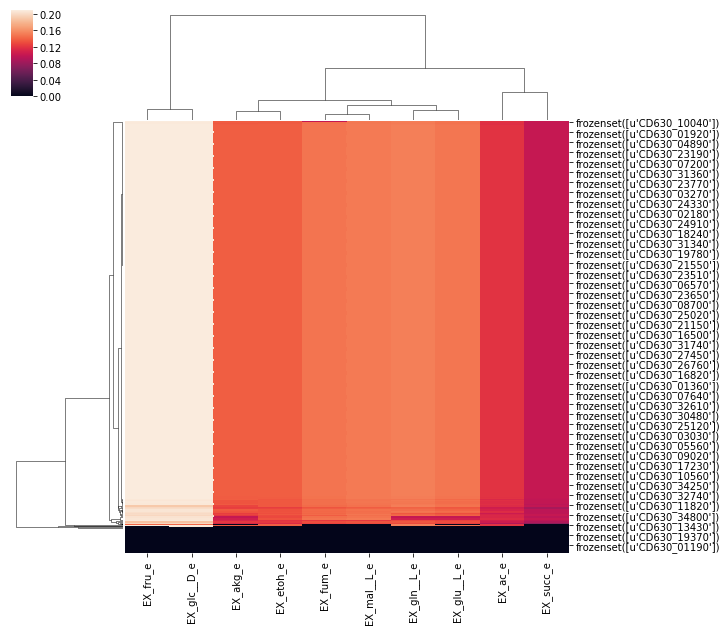

In [46]:
sns.clustermap(all_kos)

In [47]:
all_kos

,EX_ac_e,EX_akg_e,EX_etoh_e,EX_fru_e,EX_fum_e,EX_glc__D_e,EX_gln__L_e,EX_glu__L_e,EX_mal__L_e,EX_succ_e
(CD630_14460),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_07650),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_20850),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_16500),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_27340),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_35580),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_15430),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_21000),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_29900),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
(CD630_05910),1.206135e-01,1.391105e-01,1.391614e-01,2.102828e-01,1.488616e-01,2.102828e-01,1.537423e-01,1.495476e-01,1.518686e-01,0.102224
